# DSA 210
## Breaking the Myth: A Data-Driven Perspective of Immigration’s Impact on Criminal Activity 

## Part 1: Preliminary Analysis
CONTENT
1) [Data Import](#1.-Data-Import)
2) [Data Pre-Processing](#2.-Data-Pre-Proceesing)
3) [Exploratory Data Analysis (EDA)](#3.-Exploratory-Data-Analysis)
4) Hypothesis Testing

### 1. Data Import

In [1]:
import pandas as pd

#Load CSV files
immigration_df=pd.read_excel('immigration_data.xlsx')
crime_df=pd.read_csv('crime_data.csv', delimiter=';')

### 2. Data Pre-Processing

In [2]:
immigration_df.head(3)

,Country,Immigration_percentage
0,AFRICA,1.9
1,Eastern Africa,1.7
2,Burundi,2.8


In [3]:
crime_df = crime_df.rename(columns={'CrimeIndex':'Crime_Rate'})
crime_df.head(3)

,flagCode,Country,Crime_Rate,Safety
0,VE,Venezuela,81.2,18.8
1,PG,Papua New Guinea,79.7,20.3
2,AF,Afghanistan,78.3,21.7


In [4]:
print("Immigration Countries:", immigration_df['Country'].nunique())
print("Crime Countries:", crime_df['Country'].nunique())

Immigration Countries: 262
Crime Countries: 141


In [5]:
print(set(immigration_df['Country']).difference(set(crime_df['Country'])))

{'Tuvalu', 'French Guiana*', 'Niger', 'ASIA', 'Republic of Moldova*', 'Grenada', 'Chad', 'Gibraltar*', 'Saint Barthélemy*', 'Mali', 'Viet Nam', 'Tonga', 'Guinea', 'Congo', 'Eastern Africa', 'Southern Asia', 'Seychelles', 'Finland*', 'United States Virgin Islands*', 'Türkiye', 'San Marino', 'Madagascar', 'Senegal', 'United States of America*', 'French Polynesia*', 'Equatorial Guinea', 'Faroe Islands*', "Lao People's Democratic Republic", 'Saint Kitts and Nevis', 'Nauru', 'South-Eastern Asia', 'Niue*', 'AFRICA', 'NORTHERN AMERICA', 'Cabo Verde', 'Falkland Islands (Malvinas)*', 'Democratic Republic of the Congo', 'Western Sahara', 'Central African Republic', 'Micronesia', 'Burkina Faso', 'Lesotho', 'Togo', 'Vanuatu', 'OCEANIA', 'Martinique*', 'Turkmenistan', 'Timor-Leste', 'Wallis and Futuna Islands*', 'Gabon', 'Spain*', 'American Samoa*', 'Middle Africa', 'China, Hong Kong SAR', 'Benin', 'Netherlands*', 'Bolivia (Plurinational State of)', 'United Republic of Tanzania', "Côte d'Ivoire", '

We can see here that some country names have nonalphabetical characters. For example, even though Denmark exists in crime data it doesn't match to immigration data country because it is written as 'Denmark*'. Therefore we should drop nonalphabetic characters. 

In [6]:
import re

# Define a cleaning function
def clean_country_name(name):
    return re.sub(r'[^a-zA-Z\s]', '', name).strip()

# Apply to both dataframes
immigration_df['Country'] = immigration_df['Country'].apply(clean_country_name)
crime_df['Country'] = crime_df['Country'].apply(clean_country_name)

In [7]:
print(set(immigration_df['Country']).difference(set(crime_df['Country'])))


{'Tuvalu', 'Guam', 'Niger', 'ASIA', 'Curaao', 'Holy See', 'Grenada', 'Chad', 'Mali', 'Viet Nam', 'British Virgin Islands', 'Tonga', 'Guinea', 'Congo', 'Eastern Africa', 'Cook Islands', 'Southern Asia', 'Seychelles', 'San Marino', 'Madagascar', 'Senegal', 'Equatorial Guinea', 'Saint Kitts and Nevis', 'Nauru', 'Lao Peoples Democratic Republic', 'Runion', 'Greenland', 'AFRICA', 'NORTHERN AMERICA', 'Cabo Verde', 'Democratic Republic of the Congo', 'Niue', 'Western Sahara', 'Saint Martin French part', 'Trkiye', 'Central African Republic', 'Sint Maarten Dutch part', 'Burkina Faso', 'Martinique', 'Micronesia', 'Lesotho', 'Togo', 'Iran Islamic Republic of', 'Vanuatu', 'French Polynesia', 'OCEANIA', 'Bonaire Sint Eustatius and Saba', 'Wallis and Futuna Islands', 'Venezuela Bolivarian Republic of', 'Turkmenistan', 'Bolivia Plurinational State of', 'Gabon', 'Middle Africa', 'Benin', 'United Republic of Tanzania', 'Dem Peoples Republic of Korea', 'Saint Vincent and the Grenadines', 'Burundi', 'Sai

Dropping nonalphabetic characters is not enough to match the countries because naming conventions are different for example 'Russian Federation' in immigration data corrseponds to 'Russia' in crime rate data. Python has a package called country_converter which standardizes all country names to a common format. I used this package to ensure consistent country naming across datasets and to merge them.


Country_converter throws warnings for strings that are not actual country names such as region names or recent political changes like 'Trkiye' instead of 'Turkey' existing in dataset immigration_df. I included a list of regions to exclude and a list of correct names.

In [8]:
import country_converter as coco
def standardize_country_names(df, country_col='Country'):
    # Define region names to exclude
    regions_to_exclude = [
        "AFRICA", "ASIA", "EUROPE", "OCEANIA", "LATIN AMERICA AND THE CARIBBEAN", "NORTHERN AMERICA",
        "Western Europe", "Eastern Europe", "Southern Europe", "Northern Europe",
        "Eastern Asia", "Southern Asia", "SouthEastern Asia", "Central Asia", "Western Asia",
        "Middle Africa", "Eastern Africa", "Western Africa", "Northern Africa",
        "Central America", "South America", "Caribbean",
        "Melanesia", "Polynesia",
        "Channel Islands", "AustraliaNew Zealand", "More than one regular expression match for AustraliaNew Zealand"
    ]

    # Drop region-like rows
    df = df[~df[country_col].isin(regions_to_exclude)].copy()

    # Fix specific naming issues
    name_corrections = {
        "Trkiye": "Turkey",
        "China Taiwan Province of China": "Taiwan",
        "AustraliaNew Zealand": "Australia",
        "Curaao": "Curacao",
        "Runion": "Reunion",
        "Scotland (NUTS 2021)": "Scotland",
        "Northern Ireland (UK) (NUTS 2021)": "Northern Ireland"
    }
    df[country_col] = df[country_col].replace(name_corrections)

    # Preprocess names to remove unwanted text (e.g., NUTS 2021, UK) 
    # You can further customize if needed
    df[country_col] = df[country_col].apply(lambda x: re.sub(r"\s*\(.*\)", "", x))

    # Standardize country names
    df['Country_standardized'] = coco.convert(
        names=df[country_col], to='name_short', not_found=""
    )

    return df


In [9]:
immigration_df = standardize_country_names(immigration_df)
crime_df = standardize_country_names(crime_df)

In [10]:
immigration_df.head()

,Country,Immigration_percentage,Country_standardized
2,Burundi,2.8,Burundi
3,Comoros,1.4,Comoros
4,Djibouti,10.8,Djibouti
5,Eritrea,0.4,Eritrea
6,Ethiopia,0.9,Ethiopia


In [11]:
crime_df.head()

,flagCode,Country,Crime_Rate,Safety,Country_standardized
0,VE,Venezuela,81.2,18.8,Venezuela
1,PG,Papua New Guinea,79.7,20.3,Papua New Guinea
2,AF,Afghanistan,78.3,21.7,Afghanistan
3,HT,Haiti,77.9,22.1,Haiti
4,ZA,South Africa,75.4,24.6,South Africa


In [12]:
merged_df = pd.merge(immigration_df, crime_df, on='Country_standardized', how='outer')


An outer merge is used to combine all rows from two datasets, regardless of whether they have matching keys. This means that if a record exists in only one of the dataframes, it will still appear in the merged result, with missing values (NaN) filled in for the columns from the other dataframe.
Bu using outer merge, we ensure too keep all the data and not lose anything during merge, which is useful for data exploration and missing value detection. 

In [13]:
merged_df.head()

,Country_x,Immigration_percentage,Country_standardized,flagCode,Country_y,Crime_Rate,Safety
0,Burundi,2.8,Burundi,NaN,NaN,NaN,NaN
1,Comoros,1.4,Comoros,NaN,NaN,NaN,NaN
2,Djibouti,10.8,Djibouti,NaN,NaN,NaN,NaN
3,Eritrea,0.4,Eritrea,NaN,NaN,NaN,NaN
4,Ethiopia,0.9,Ethiopia,ET,Ethiopia,50.8,49.2


In [14]:
# Rearrange the stucture of the dataframe
# Drop unwanted columns
merged_df.drop(['Country_x', 'Country_y', 'Safety'], axis=1, inplace=True)

# Rename 'Country_standardized' to 'Country' and move it to the front
merged_df.rename(columns={'Country_standardized': 'Country'}, inplace=True)
cols = merged_df.columns.tolist()
cols.insert(0, cols.pop(cols.index('Country')))
merged_df = merged_df[cols]

# Check the updated DataFrame
print(merged_df.head())


    Country  Immigration_percentage flagCode  Crime_Rate
0   Burundi                     2.8      NaN         NaN
1   Comoros                     1.4      NaN         NaN
2  Djibouti                    10.8      NaN         NaN
3   Eritrea                     0.4      NaN         NaN
4  Ethiopia                     0.9       ET        50.8


### 3. Exploratory Data Analysis

In [15]:
#Data Shape
merged_df.shape

(236, 4)

In [16]:
merged_df.dtypes

Country                    object
Immigration_percentage    float64
flagCode                   object
Crime_Rate                float64
dtype: object

Observations:
*Concentration at Low Immigration Percentage:
Data points 

In [17]:
merged_df.isnull().sum()

Country                    0
Immigration_percentage     2
flagCode                  95
Crime_Rate                94
dtype: int64

In [18]:
merged_df.isnull().sum()/len(merged_df)

Country                   0.000000
Immigration_percentage    0.008475
flagCode                  0.402542
Crime_Rate                0.398305
dtype: float64

-->High percentage of missing values in crime index column.

Statistics

In [19]:
merged_df.describe()

,Immigration_percentage,Crime_Rate
count,234.000000,142.000000
mean,15.091880,45.865493
std,19.851984,15.459891
min,0.000000,12.900000
25%,1.725000,32.950000
50%,6.400000,46.450000
75%,18.425000,56.125000
max,100.000000,81.200000


Let's see how much the missing values of crime index affects the results. 

In [20]:
df_cleaned=merged_df.dropna(axis=0, how='any', inplace=False)


In [21]:
df_cleaned.describe()

,Immigration_percentage,Crime_Rate
count,141.000000,141.000000
mean,11.602128,45.737589
std,15.786013,15.439423
min,0.000000,12.900000
25%,1.500000,32.800000
50%,5.300000,46.400000
75%,14.400000,55.300000
max,76.700000,81.200000


In [22]:
(merged_df['Immigration_percentage'].mean() - df_cleaned['Immigration_percentage'].mean())/merged_df['Immigration_percentage'].mean()

0.23123378951141838

Missing values change the mean of immigration percentage by 23%.

In [25]:
import numpy as np
np.corrcoef(merged_df['Immigration_percentage'],merged_df['Crime_Rate'])

array([[nan, nan],
       [nan, nan]])

We cannot calculate correlation because of the missing values. 

In [27]:
np.corrcoef(df_cleaned['Immigration_percentage'],df_cleaned['Crime_Rate'])

array([[ 1.        , -0.50337572],
       [-0.50337572,  1.        ]])

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

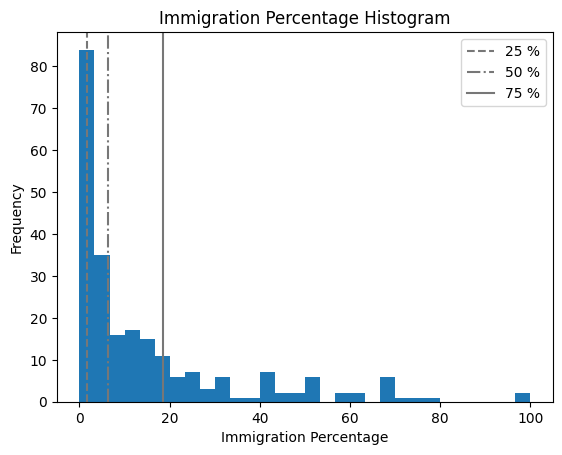

In [29]:
plt.hist(merged_df['Immigration_percentage'],bins=30)
q1=np.nanpercentile(merged_df['Immigration_percentage'],25)
q2=np.nanpercentile(merged_df['Immigration_percentage'],50)
q3=np.nanpercentile(merged_df['Immigration_percentage'],75)
plt.axvline(q1,color='#777777',linestyle='dashed',label='25 %')
plt.axvline(q2,color='#777777',linestyle='dashdot',label='50 %')
plt.axvline(q3,color='#777777',linestyle='solid',label='75 %')
plt.legend(loc='upper right')
plt.xlabel('Immigration Percentage')
plt.ylabel('Frequency')
plt.title('Immigration Percentage Histogram')
plt.savefig('immigration_histogram.png')
plt.show()

Observations:
1. Highly skewed distribution: The data is heavily right-skewed, indicating that most countries have low immigration percentages.
2. Long tail: There are some countries with very high immigration percentages, which are potential outliers.

Outlier Detection 

                               Country  Immigration_percentage
9                              Mayotte                    44.0
66                               Macau                    59.3
88                           Singapore                    48.7
94                             Bahrain                    52.3
99                              Jordan                    45.7
100                             Kuwait                    67.3
103                              Qatar                    76.7
108               United Arab Emirates                    74.0
126                        Isle of Man                    51.9
133                            Andorra                    59.1
138                            Vatican                   100.0
152                      Liechtenstein                    69.4
153                         Luxembourg                    51.2
154                             Monaco                    70.2
159                              Aruba                 

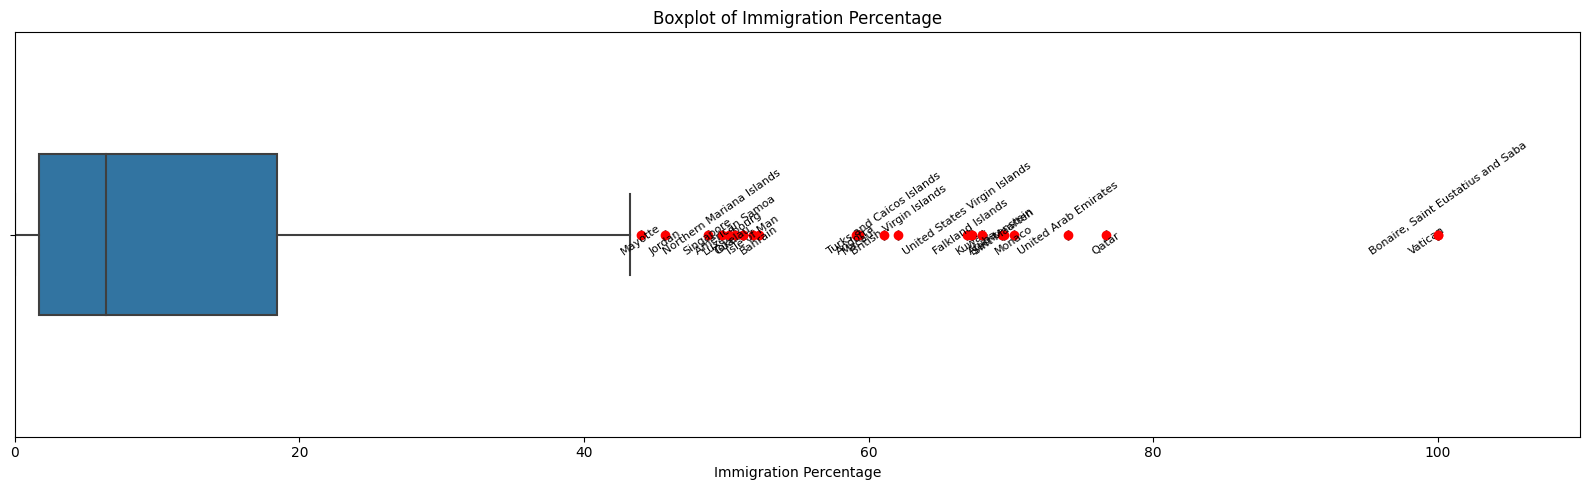

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate IQR to find outliers
Q1 = merged_df['Immigration_percentage'].quantile(0.25)
Q3 = merged_df['Immigration_percentage'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.5 * IQR

# Step 2: Filter outliers
outliers = merged_df[merged_df['Immigration_percentage'] > outlier_threshold].copy()
print(outliers[['Country', 'Immigration_percentage']])

# Step 3: Create the boxplot
plt.figure(figsize=(16, 5))
sns.boxplot(x=merged_df['Immigration_percentage'], width=0.4)
plt.title('Boxplot of Immigration Percentage')
plt.xlabel('Immigration Percentage')

# Step 4: Adjust overlapping labels
x_counts = outliers['Immigration_percentage'].value_counts()
dup_values = x_counts[x_counts > 1].index.tolist()

for i, (_, row) in enumerate(outliers.iterrows()):
    x = row['Immigration_percentage']
    y = 0
    label = row['Country']

    # Slight offset if this x value appears more than once
    if x in dup_values:
        offset = (i % 2) * 1.5 - 0.75  # alternate left/right: -0.75, +0.75
        x_display = x + offset
    else:
        x_display = x

    plt.scatter(x, y, color='red', zorder=3)
    plt.text(x_display, 0.05, label,
             rotation=35, ha='center', fontsize=8)

plt.xlim(0, outliers['Immigration_percentage'].max() + 10)
plt.tight_layout()
plt.savefig('immigration_boxplot.png')
plt.show()


As seen abpve  Bonaire, Saint Eustatius and Saba  and Vatican has 100% immigration percentage. It is due to how immigration percentage is calculated. It refers to the ratio of number of immigrants to the total poulation. Bonaire, Saint Eustatius and Saba and Vatican has small population but high proportion of foreign born residents, creating this statistical effect.

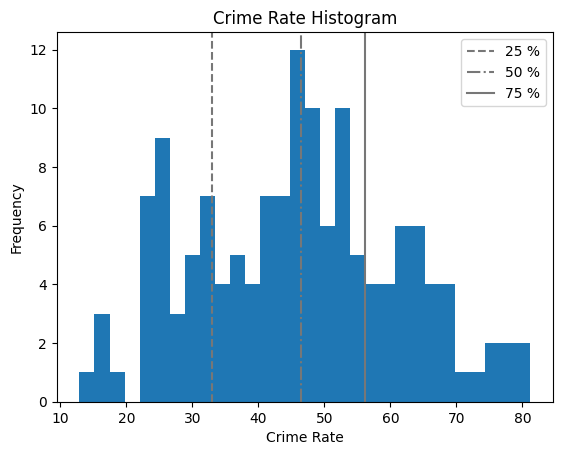

In [31]:
plt.hist(merged_df['Crime_Rate'],bins=30)
q1=np.nanpercentile(merged_df['Crime_Rate'],25)
q2=np.nanpercentile(merged_df['Crime_Rate'],50)
q3=np.nanpercentile(merged_df['Crime_Rate'],75)
plt.axvline(q1,color='#777777',linestyle='dashed',label='25 %')
plt.axvline(q2,color='#777777',linestyle='dashdot',label='50 %')
plt.axvline(q3,color='#777777',linestyle='solid',label='75 %')
plt.legend(loc='upper right')
plt.xlabel('Crime Rate')
plt.ylabel('Frequency')
plt.title('Crime Rate Histogram')
plt.savefig('crime_histogram.png')
plt.show()

Observations:
1. Rougly symmetrical distribution: The data appears more balanced with less skewness. 


No crime rate outliers detected.


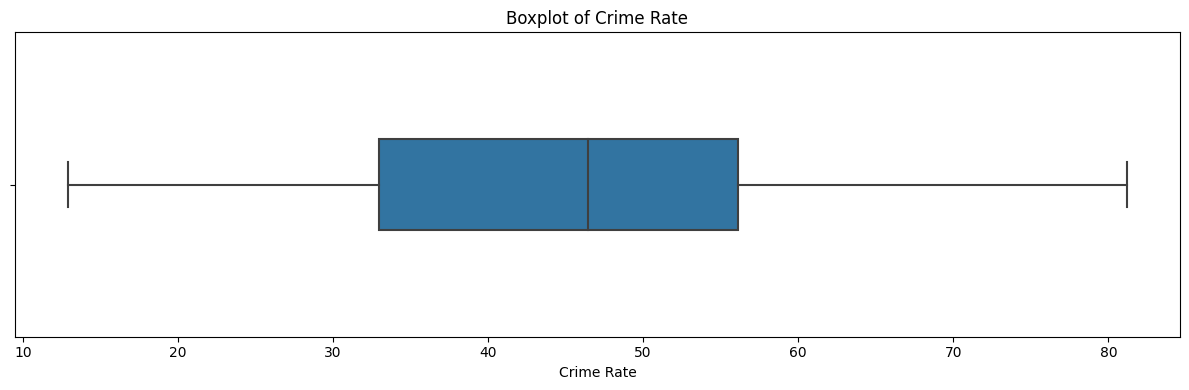

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))
sns.boxplot(x=merged_df['Crime_Rate'], width=0.3)
plt.title('Boxplot of Crime Rate')
plt.xlabel('Crime Rate')

if not crime_outliers.empty:
    # Plot and annotate outlier points
    for _, row in crime_outliers.iterrows():
        plt.scatter(row['Crime_Rate'], 0, color='red', zorder=3)
        plt.text(row['Crime_Rate'], 0.05, row['Country_standardized'],
                 fontsize=8, rotation=45, ha='left', va='bottom')

    # Extend x-axis to avoid clipping
    max_val = crime_outliers['Crime_Rate'].max()
    plt.xlim(0, max_val + 5)
else:
    # Optional: Print a message if no outliers
    print("No crime rate outliers detected.")

plt.tight_layout()
plt.savefig('crime_boxplot.png')
plt.show()


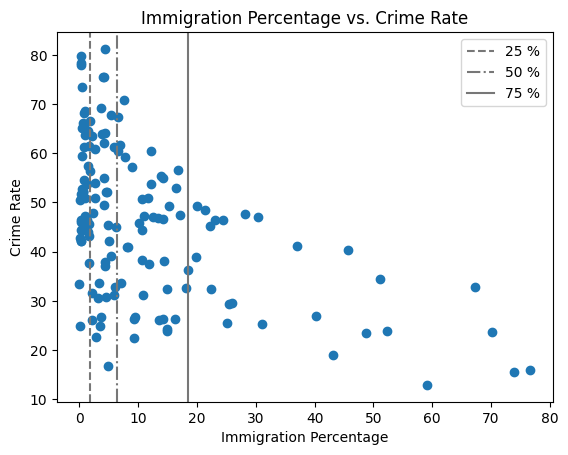

In [57]:
plt.scatter(merged_df['Immigration_percentage'],merged_df['Crime_Rate'])

q1=np.nanpercentile(merged_df['Immigration_percentage'],25)
q2=np.nanpercentile(merged_df['Immigration_percentage'],50)
q3=np.nanpercentile(merged_df['Immigration_percentage'],75)
plt.axvline(q1,color='#777777',linestyle='dashed',label='25 %')
plt.axvline(q2,color='#777777',linestyle='dashdot',label='50 %')
plt.axvline(q3,color='#777777',linestyle='solid',label='75 %')
plt.legend(loc='upper right')


plt.title('Immigration Percentage vs. Crime Rate')
plt.xlabel('Immigration Percentage')
plt.ylabel('Crime Rate')
plt.savefig('immigration_vs_crime.png')
plt.show()


Observations:
1. Overall Trend: There appears to be no clear linear correlation between immigration percentage and crime rate. 
2. Clustering: Most counctries cluster in the low immigration(0-10%) and moderate crime rate zone. 

While the initial goal of this project was to conduct a global analysis, early exploration of the data revealed that certain countries — particularly in South America and some tropical regions — exhibit extremely high crime rates despite having relatively low immigration levels. Including these countries in the main analysis could misrepresent or obscure the relationship under investigation, as their crime rates are likely driven by more fundamental issues such as political instability, organized crime, poverty, and weak judicial institutions. These underlying factors act as confounders, making it difficult to isolate the effect of immigration on crime. To ensure a more valid and interpretable analysis, this study will focus on European countries, which tend to have more comparable economic conditions, better institutional structures, and more consistent crime and immigration reporting standards. By narrowing the scope in this way, the project reduces external variability and increases the likelihood of uncovering meaningful patterns specific to the immigration-crime dynamic, rather than broader structural issues that dominate in less stable regions.

In [35]:
# List of European countries using ISO Alpha-2 codes
europe_iso2 = [
    'AL', 'AD', 'AT', 'BY', 'BE', 'BA', 'BG', 'HR', 'CY', 'CZ',
    'DK', 'EE', 'FI', 'FR', 'DE', 'GR', 'HU', 'IS', 'IE', 'IT',
    'XK', 'LV', 'LI', 'LT', 'LU', 'MT', 'MD', 'MC', 'ME', 'NL',
    'MK', 'NO', 'PL', 'PT', 'RO', 'RU', 'SM', 'RS', 'SK', 'SI',
    'ES', 'SE', 'CH', 'UA', 'GB', 'VA'
]

In [36]:
import country_converter as coco

def filter_by_iso2(df, country_col='Country', flag_col='flagCode'):
    """
    Filters the DataFrame based on a list of ISO2 country codes and adds flag codes (ISO2) to the DataFrame.

    Parameters:
    df (pandas DataFrame): The DataFrame to filter.
    iso2_codes (list): The list of ISO2 country codes to filter by.
    country_col (str): The name of the column containing the country names (default is 'Country').
    flag_col (str): The name of the column to store the flag codes (default is 'flagCode').

    Returns:
    pandas DataFrame: Filtered DataFrame with only the rows having flag codes in iso2_codes.
    """
    # Add flag codes to the DataFrame by mapping the country names to flag codes
    df[flag_col] = coco.convert(names=df[country_col], to='ISO2')

    # Filter the DataFrame based on the ISO2 codes
    filtered_df = df[df[flag_col].isin(europe_iso2)].copy()

    return filtered_df


In [37]:
european_df=merged_df[merged_df['flagCode'].isin(europe_iso2)]
european_df.head()

,Country,Immigration_percentage,flagCode,Crime_Rate
95,Cyprus,14.9,CY,32.4
110,Belarus,11.6,BY,50.8
111,Bulgaria,4.4,BG,37.1
112,Czechia,9.5,CZ,26.8
113,Hungary,7.1,HU,33.7


Descriptive Statistics for Europe

In [38]:
european_df.describe()

,Immigration_percentage,Crime_Rate
count,41.000000,41.000000
mean,17.297561,35.736585
std,14.444298,9.503361
min,1.700000,12.900000
25%,9.200000,26.800000
50%,14.200000,34.400000
75%,19.800000,45.100000
max,70.200000,55.300000


In [39]:
european_df.isnull().sum()

Country                   0
Immigration_percentage    0
flagCode                  0
Crime_Rate                0
dtype: int64

Explanatory Data Analysis for Europe

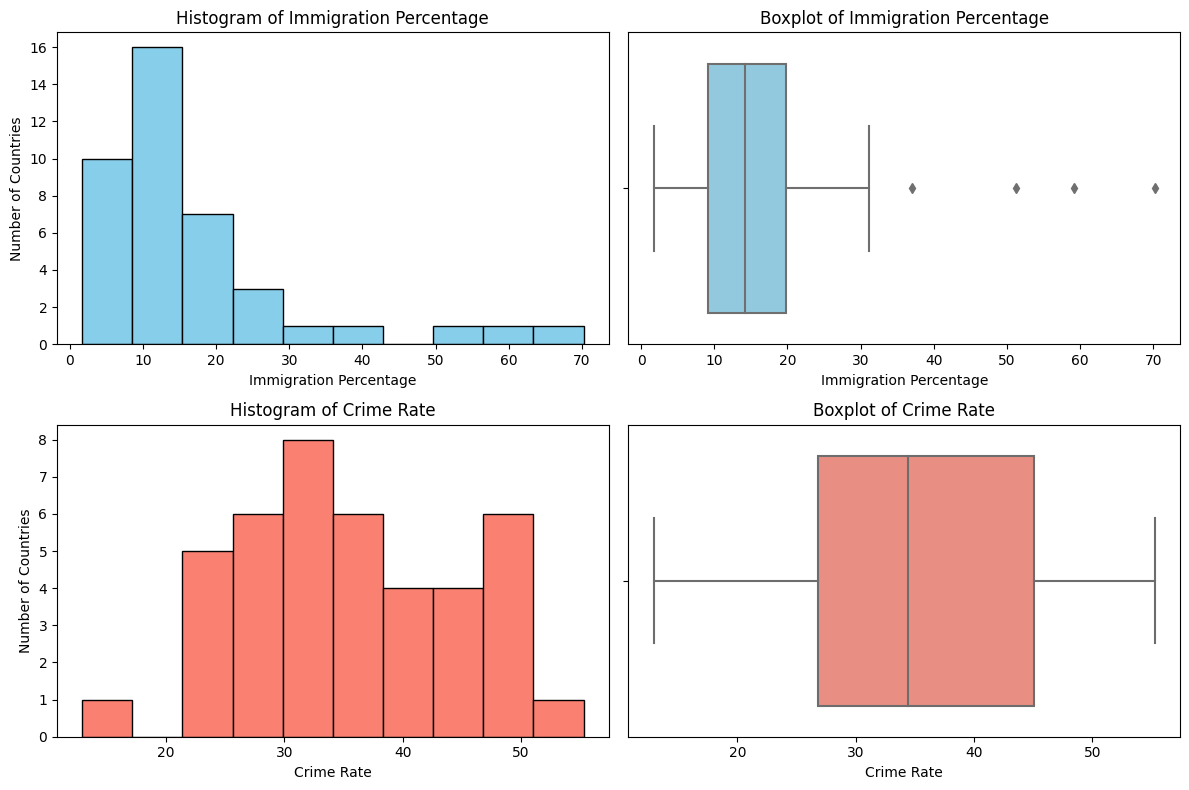

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))  # Adjust figure size

# Immigration Histogram (top-left)
plt.subplot(2, 2, 1)
plt.hist(european_df['Immigration_percentage'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Immigration Percentage')
plt.xlabel('Immigration Percentage')
plt.ylabel('Number of Countries')

# Immigration Boxplot (top-right)
plt.subplot(2, 2, 2)
sns.boxplot(x=european_df['Immigration_percentage'], color='skyblue')
plt.title('Boxplot of Immigration Percentage')
plt.xlabel('Immigration Percentage')

# Crime Histogram (bottom-left)
plt.subplot(2, 2, 3)
plt.hist(european_df['Crime_Rate'], bins=10, color='salmon', edgecolor='black')
plt.title('Histogram of Crime Rate')
plt.xlabel('Crime Rate')
plt.ylabel('Number of Countries')

# Crime Boxplot (bottom-right)
plt.subplot(2, 2, 4)
sns.boxplot(x=european_df['Crime_Rate'], color='salmon')
plt.title('Boxplot of Crime Rate')
plt.xlabel('Crime Rate')

plt.tight_layout()
plt.savefig('europe.png')
plt.show()


In [59]:
# Step 1: Calculate IQR
Q1 = european_df['Immigration_percentage'].quantile(0.25)
Q3 = european_df['Immigration_percentage'].quantile(0.75)
IQR = Q3 - Q1
threshold = Q3 + 1.5 * IQR

# Step 2: Filter outliers
immigration_outliers = european_df[european_df['Immigration_percentage'] > threshold]

# Step 3: Display them
print("Immigration Outliers (based on IQR method):")
print(immigration_outliers[['Country', 'Immigration_percentage']])


Immigration Outliers (based on IQR method):
        Country  Immigration_percentage
133     Andorra                    59.1
140       Malta                    37.0
153  Luxembourg                    51.2
154      Monaco                    70.2


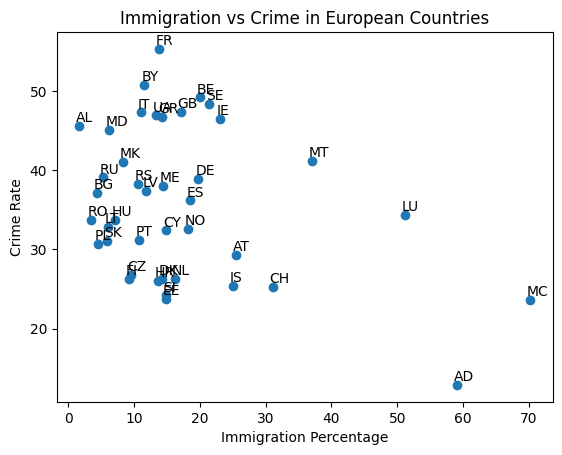

In [63]:
plt.scatter('Immigration_percentage','Crime_Rate',data=european_df)
# Add country codes as labels to each point
for i, row in european_df.iterrows():
    plt.text(row['Immigration_percentage']-0.5, row['Crime_Rate']+0.5, row['flagCode'], )

plt.xlabel('Immigration Percentage')
plt.ylabel('Crime Rate')
plt.title('Immigration vs Crime in European Countries')
plt.savefig('scatter_europe.png')
plt.show()

4. Hypothesis Testing

In [42]:
import numpy as np

In [43]:
np.corrcoef(european_df['Immigration_percentage'],european_df['Crime_Rate'])

array([[ 1.        , -0.33574244],
       [-0.33574244,  1.        ]])

In [44]:
from scipy.stats import spearmanr
spearmanr(european_df['Immigration_percentage'],european_df['Crime_Rate'])

SignificanceResult(statistic=-0.1742919389978213, pvalue=0.2757712339515884)

To evaluate whether there is a relationship between immigration levels and crime rates, I divided the countries into distinct groups based on their immigration percentages as low, medium, and high immigration using quantiles (tertiles for 3 groups). This method allows us to search for potential non-linear patterns beyond linear relationships we can observe with pearson or spearman correlation coefficients. Using tertiles also ensures that each group contains roughly equal number of observations, which improves the comprability of statistical analyses. By applying ANOVA, I can statistically test whether the differences in crime indices across these groups are significant, thereby providing a clearer understanding of the impact of immigration on crime.



ANOVA Hypothesis testing\
Null Hypothesis: Immigration percentage does not have an effect on the crime index.\
Alternative Hypothesis: There is at least one group whose mean crime index is significantly different from others. 


In [45]:
# Divide into tertiles (3 roughly equal groups)
european_df['Immigration_Group'] = pd.qcut(
    european_df['Immigration_percentage'],
    q=3,
    labels=['Low Immigration', 'Medium Immigration', 'High Immigration']
)


C:\Users\SILA\AppData\Local\Temp\ipykernel_18148\1927107284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  european_df['Immigration_Group'] = pd.qcut(


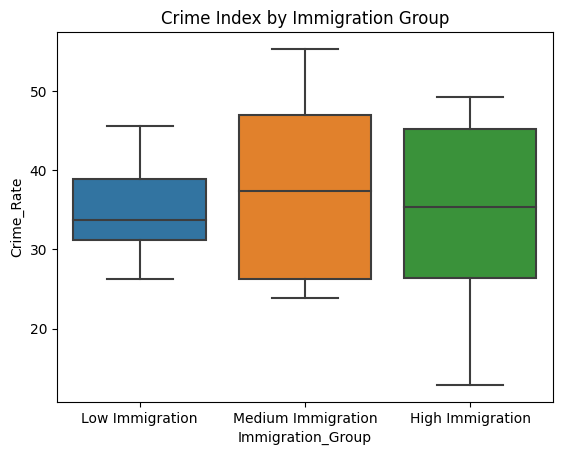

In [46]:
sns.boxplot(x='Immigration_Group', y='Crime_Rate', data=european_df)
plt.title("Crime Index by Immigration Group")
plt.show()

In [47]:
from scipy.stats import f_oneway

low = european_df[european_df['Immigration_Group'] == 'Low Immigration']['Crime_Rate']
medium = european_df[european_df['Immigration_Group'] == 'Medium Immigration']['Crime_Rate']
high = european_df[european_df['Immigration_Group'] == 'High Immigration']['Crime_Rate']

f_stat, p_value = f_oneway(low, medium, high)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")


F-statistic: 0.1694557882168883
P-value: 0.8447584195076667


In [48]:
european_df.describe()

,Immigration_percentage,Crime_Rate
count,41.000000,41.000000
mean,17.297561,35.736585
std,14.444298,9.503361
min,1.700000,12.900000
25%,9.200000,26.800000
50%,14.200000,34.400000
75%,19.800000,45.100000
max,70.200000,55.300000


PART 2) DETAILED ANALYSIS  
To strengthen my analysis, I decided to expand the dataset by including specific crime types instead of relying solely on a general crime index. Aggregated measures may hide important patterns, as different crimes—like homicide, burglary, or fraud—can be influenced by distinct factors. This enhancement allows for more targeted analysis and meaningful hypothesis testing to explore whether immigration correlates with particular crime categories.

To enrich the analysis, I included the Migrant Integration Policy Index (MIPEX) as it provides valuable insight into how well countries support the integration of immigrants through policies in areas like education, labor market mobility, and anti-discrimination. This index helps contextualize crime and immigration data by highlighting whether inclusive policies may influence societal outcomes. Since the most recent MIPEX data is from 2019, I aligned all other features—such as crime rates and immigration percentages—to that year to maintain consistency. Using 2019 data also avoids potential distortions caused by the COVID-19 pandemic, which significantly disrupted migration patterns and crime statistics.

Import Data

In [49]:
immigration_2019_df=pd.read_excel('immigration_data_2019.xlsx')
mipex_df=pd.read_excel('MIPEX.xlsx')
crime_2019_df=pd.read_excel('crime_2019.xlsx')

In [50]:
crime_2019_df.dtypes

GEO (Labels)      object
Homicide          object
SexualViolence    object
Rape              object
SexualAssault     object
Theft             object
dtype: object

In [51]:
# Convert a specific column to numeric
df['column_name'] = pd.to_numeric(df['Homicide'], errors='coerce')

NameError: name 'df' is not defined

In [ ]:
crime_2019_df.isnull().sum()

GEO (Labels)            41
Homicide                 4
SexualViolence           5
Rape                     6
SexualAssault            9
Theft                    5
Country_standardized    41
flagCode                41
dtype: int64

In [ ]:
print(crime_2019_df.columns)
print(immigration_2019_df.columns)
print(mipex_df.columns)

Index(['GEO (Labels)', 'Homicide', 'SexualViolence', 'Rape', 'SexualAssault',
       'Theft'],
      dtype='object')
Index(['Country', 'Immigration'], dtype='object')
Index(['Country', 'MIPEX'], dtype='object')


In [ ]:
crime_2019_df=standardize_country_names(crime_2019_df,'GEO (Labels)')
immigration_2019_df=standardize_country_names(immigration_2019_df,'Country')
mipex_df=standardize_country_names(mipex_df,'Country')

Scotland not found in regex
Northern Ireland not found in regex


In [ ]:
print(crime_2019_df.columns,'size', crime_2019_df.shape)
print(immigration_2019_df.columns,'size', immigration_2019_df.size)
print(mipex_df.columns,'size',mipex_df.size)

Index(['GEO (Labels)', 'Homicide', 'SexualViolence', 'Rape', 'SexualAssault',
       'Theft', 'Country_standardized'],
      dtype='object') size (41, 7)
Index(['Country', 'Immigration', 'Country_standardized'], dtype='object') size 141
Index(['Country', 'MIPEX', 'Country_standardized'], dtype='object') size 144


In [ ]:
crime_2019_europe=filter_by_iso2(crime_2019_df,'Country_standardized')
immigration_2019_europe=filter_by_iso2(immigration_2019_df,'Country_standardized')
mipex_europe=filter_by_iso2(mipex_df,'Country_standardized')

Scotland not found in regex
Northern Ireland not found in regex


In [ ]:
print(crime_2019_europe.columns,'shape', crime_2019_europe.shape)
print(immigration_2019_europe.columns,'shape',immigration_2019_europe.shape)
print(mipex_europe.columns,'shape',mipex_europe.shape)

Index(['GEO (Labels)', 'Homicide', 'SexualViolence', 'Rape', 'SexualAssault',
       'Theft', 'Country_standardized', 'flagCode'],
      dtype='object') size (38, 8)
Index(['Country', 'Immigration', 'Country_standardized', 'flagCode'], dtype='object') size (44, 4)
Index(['Country', 'MIPEX', 'Country_standardized', 'flagCode'], dtype='object') size (36, 4)


As seen above, crime data has 38 rows whereas immigration data has 44 and MIPEX data has 36. We will use inner join to find their overlap.

In [ ]:
# Perform the inner join on the 'Country_standardized' column
merged_europe_df = pd.merge(crime_2019_europe, immigration_2019_europe, on='Country_standardized', how='inner')
merged_europe_df = pd.merge(merged_europe_df, mipex_europe, on='Country_standardized', how='inner')

# Print the shape and columns of the merged dataset
print(merged_europe_df.columns, 'shape', merged_europe_df.shape)


Index(['GEO (Labels)', 'Homicide', 'SexualViolence', 'Rape', 'SexualAssault',
       'Theft', 'Country_standardized', 'flagCode_x', 'Country_x',
       'Immigration', 'flagCode_y', 'Country_y', 'MIPEX', 'flagCode'],
      dtype='object') shape (32, 14)


In [ ]:
merged_europe_df.head()

,GEO (Labels),Homicide,SexualViolence,Rape,SexualAssault,Theft,Country_standardized,flagCode_x,Country_x,Immigration,flagCode_y,Country_y,MIPEX,flagCode
0,Belgium,1.28,84.13,36.85,47.29,1985.09,Belgium,BE,Belgium,17.2,BE,Belgium,69,BE
1,Bulgaria,1.16,8.64,1.87,6.77,473.88,Bulgaria,BG,Bulgaria,2.4,BG,Bulgaria,40,BG
2,Czechia,0.76,14.65,6.41,8.12,561.98,Czechia,CZ,Czechia,4.8,CZ,Czechia,50,CZ
3,Denmark,0.93,84.31,35.33,48.98,2928.71,Denmark,DK,Denmark,12.5,DK,Denmark,49,DK
4,Germany,0.71,49.05,11.53,37.52,1235.04,Germany,DE,Germany,15.7,DE,Germany,58,DE


In [ ]:
#We can drop unnecessary columns
merged_europe_df.drop(columns=['GEO (Labels)', 'flagCode_x', 'Country_x','flagCode_y','Country_y','flagCode'], inplace=True)
merged_europe_df.head()

,Homicide,SexualViolence,Rape,SexualAssault,Theft,Country_standardized,Immigration,MIPEX
0,1.28,84.13,36.85,47.29,1985.09,Belgium,17.2,69
1,1.16,8.64,1.87,6.77,473.88,Bulgaria,2.4,40
2,0.76,14.65,6.41,8.12,561.98,Czechia,4.8,50
3,0.93,84.31,35.33,48.98,2928.71,Denmark,12.5,49
4,0.71,49.05,11.53,37.52,1235.04,Germany,15.7,58


In [ ]:
#rearrange columns

# Step 1: Rename the column (assuming 'old_column_name' is the column you want to rename)
merged_europe_df.rename(columns={'Country_standardized': 'Country'}, inplace=True)

# Step 2: Rearrange columns to make 'new_column_name' the first column
cols = ['Country'] + [col for col in merged_europe_df if col != 'Country']
merged_europe_df = merged_europe_df[cols]

# Display the updated DataFrame
merged_europe_df.head()


,Country,Homicide,SexualViolence,Rape,SexualAssault,Theft,Immigration,MIPEX
0,Belgium,1.28,84.13,36.85,47.29,1985.09,17.2,69
1,Bulgaria,1.16,8.64,1.87,6.77,473.88,2.4,40
2,Czechia,0.76,14.65,6.41,8.12,561.98,4.8,50
3,Denmark,0.93,84.31,35.33,48.98,2928.71,12.5,49
4,Germany,0.71,49.05,11.53,37.52,1235.04,15.7,58


In [ ]:
# Convert all columns that can be converted to numeric, leaving non-convertible values unchanged
merged_europe_df = merged_europe_df.apply(pd.to_numeric, errors='ignore')

# Display the updated DataFrame
print(merged_europe_df.head())


    Country  Homicide  SexualViolence   Rape SexualAssault    Theft  \
0   Belgium      1.28           84.13  36.85         47.29  1985.09   
1  Bulgaria      1.16            8.64   1.87          6.77   473.88   
2   Czechia      0.76           14.65   6.41          8.12   561.98   
3   Denmark      0.93           84.31  35.33         48.98  2928.71   
4   Germany      0.71           49.05  11.53         37.52  1235.04   

   Immigration  MIPEX  
0         17.2     69  
1          2.4     40  
2          4.8     50  
3         12.5     49  
4         15.7     58  


In [ ]:
merged_europe_df.dtypes

Country            object
Homicide          float64
SexualViolence    float64
Rape               object
SexualAssault      object
Theft              object
Immigration       float64
MIPEX               int64
dtype: object

In [ ]:
merged_europe_df['Rape'].isnull().sum()

0

In [ ]:
merged_europe_df['Rape']

0     36.85
1      1.87
2      6.41
3     35.33
4     11.53
5     15.32
6     21.72
7       1.7
8      3.99
9     34.05
10    11.58
11        :
12     8.91
13     3.36
14     18.9
15      3.9
16     6.28
17    11.89
18    18.92
19     1.87
20     4.19
21     8.04
22     8.75
23     1.78
24    27.38
25    80.85
26    60.23
27    41.23
28     7.95
29     1.69
30     2.69
31     1.67
Name: Rape, dtype: object

The problem here is that missing values are shown as ":". So I need to handle some missing values. I will use the mean to handle them. 

In [ ]:
# Replace ":" with NaN
merged_europe_df.replace(":", np.nan, inplace=True)

# Impute missing values with the mean of each column
df = merged_europe_df.apply(lambda col: col.fillna(col.mean()) if col.dtype in ['float64', 'int64'] else col)

# Check the updated DataFrame
print(df.head())

    Country  Homicide  SexualViolence   Rape  SexualAssault    Theft  \
0   Belgium      1.28           84.13  36.85          47.29  1985.09   
1  Bulgaria      1.16            8.64   1.87           6.77   473.88   
2   Czechia      0.76           14.65   6.41           8.12   561.98   
3   Denmark      0.93           84.31  35.33          48.98  2928.71   
4   Germany      0.71           49.05  11.53          37.52  1235.04   

   Immigration  MIPEX Immigration_Level  
0         17.2     69              High  
1          2.4     40               Low  
2          4.8     50               Low  
3         12.5     49              High  
4         15.7     58              High  


In [ ]:
# Ensure ":" is treated as string and replaced
merged_europe_df.replace(":", np.nan, inplace=True)
# Convert all relevant columns to numeric, coercing errors into NaN
for col in merged_europe_df.columns:
    if col not in ['Country']:  # skip non-numeric columns like 'Country'
        merged_europe_df[col] = pd.to_numeric(merged_europe_df[col], errors='coerce')
print(merged_europe_df.isna().sum())
# Fill NaNs with column mean for numeric columns
merged_europe_df = merged_europe_df.fillna(merged_europe_df.mean(numeric_only=True))


Country               0
Homicide              0
SexualViolence        0
Rape                  1
SexualAssault         4
Theft                 1
Immigration           0
MIPEX                 0
Immigration_Level    32
dtype: int64


In [ ]:
df.isnull().sum()

Country               0
Homicide              0
SexualViolence        0
Rape                  0
SexualAssault         0
Theft                 0
Immigration           0
MIPEX                 0
Immigration_Level    32
dtype: int64

In [ ]:
merged_europe_df['SexualAssault']

0      47.290000
1       6.770000
2       8.120000
3      48.980000
4      37.520000
5      11.470000
6      36.560000
7       0.650000
8      23.770000
9      48.160000
10      8.610000
11     21.884643
12      7.080000
13      3.440000
14     21.884643
15     21.884643
16     17.830000
17     12.990000
18     26.640000
19      1.520000
20     22.090000
21      1.810000
22      2.840000
23      1.430000
24     45.270000
25    108.910000
26     19.890000
27     46.750000
28      7.330000
29     21.884643
30      2.690000
31      6.360000
Name: SexualAssault, dtype: float64

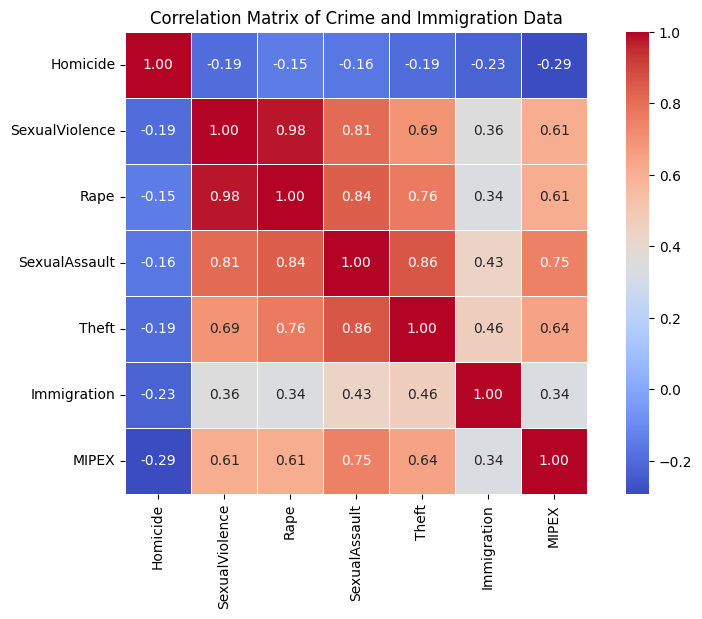

In [ ]:
numerical_data = merged_europe_df[['Homicide', 'SexualViolence', 'Rape', 'SexualAssault', 'Theft', 'Immigration', 'MIPEX']]

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,square=True)
plt.title('Correlation Matrix of Crime and Immigration Data')
plt.show()

posx and posy should be finite values
posx and posy should be finite values


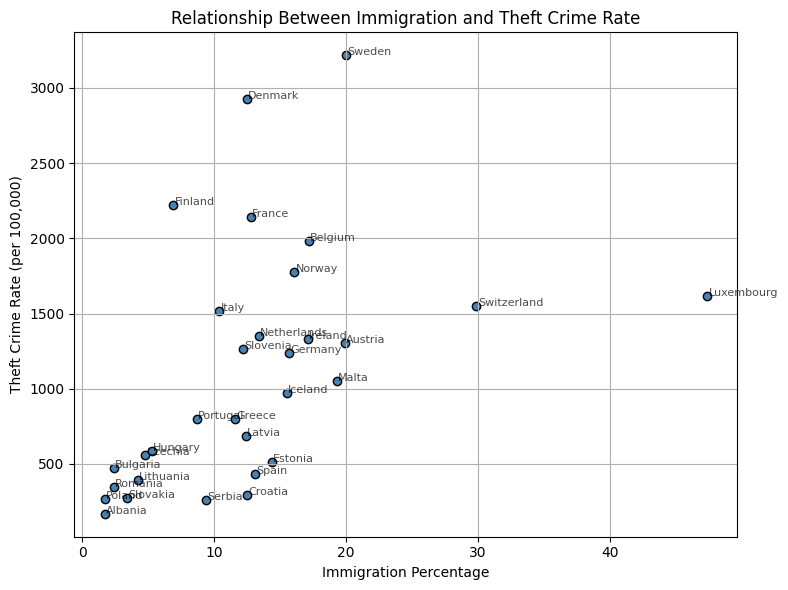

In [ ]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(merged_europe_df['Immigration'], merged_europe_df['Theft'], color='steelblue', edgecolor='black')

# Add labels and title
plt.xlabel('Immigration Percentage')
plt.ylabel('Theft Crime Rate (per 100,000)')
plt.title('Relationship Between Immigration and Theft Crime Rate')

# Optional: Add country labels
for i, row in merged_europe_df.iterrows():
    plt.text(row['Immigration'] + 0.1, row['Theft'] + 0.1, row['Country'], fontsize=8, alpha=0.7)

plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the median immigration value
median_immigration = merged_europe_df['Immigration'].median()

# Create a new column categorizing immigration as 'Low' or 'High'
merged_europe_df['Immigration_Level'] = merged_europe_df['Immigration'].apply(
    lambda x: 'Low' if x < median_immigration else 'High'
)

# Check the result
print(merged_europe_df[['Country', 'Immigration', 'Immigration_Level']].head(40))

            Country  Immigration Immigration_Level
0           Belgium         17.2              High
1          Bulgaria          2.4               Low
2           Czechia          4.8               Low
3           Denmark         12.5              High
4           Germany         15.7              High
5           Estonia         14.4              High
6           Ireland         17.1              High
7            Greece         11.6               Low
8             Spain         13.1              High
9            France         12.8              High
10          Croatia         12.5              High
11            Italy         10.4               Low
12           Latvia         12.4               Low
13        Lithuania          4.2               Low
14       Luxembourg         47.4              High
15          Hungary          5.3               Low
16            Malta         19.3              High
17      Netherlands         13.4              High
18          Austria         19.

In [ ]:
merged_europe_df.isnull().sum()

Country              0
Homicide             0
SexualViolence       0
Rape                 0
SexualAssault        0
Theft                0
Immigration          0
MIPEX                0
Immigration_Level    0
dtype: int64

In [ ]:
from scipy.stats import ttest_ind

# Divide the groups
low_immigration = merged_europe_df[merged_europe_df['Immigration_Level'] == 'Low']['Theft']
high_immigration = merged_europe_df[merged_europe_df['Immigration_Level'] == 'High']['Theft']

# Perform the t-test
t_stat, p_value = ttest_ind(low_immigration, high_immigration)

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in theft rates between low and high immigration countries.")
else:
    print("Fail to reject the null hypothesis: No significant difference in theft rates between the two groups.")


T-statistic: -3.044028159951456
P-value: 0.004823368470729481
Reject the null hypothesis: There is a significant difference in theft rates between low and high immigration countries.
